# 1. Linear Regression in 1D

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generating the 1D data for linear regression
N = 100
D = 1
X = np.random.uniform(low=0, high=100, size=N).reshape(-1, D)
Y = 2*X + 1 + np.random.normal(scale=10, size=N).reshape(-1, D)

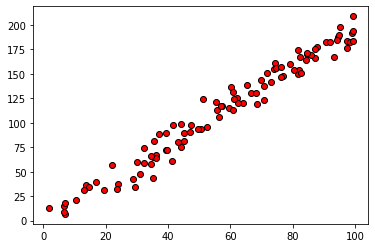

In [4]:
plt.scatter(X, Y, edgecolor="black", color="red")
plt.show()

### 1.1. Closed form solution using y = a*X + b

In [5]:
# Applying the linear regression solution of closed form should do the work here
# In case of simple linear regression, we can model the relationship like y = a*X + b.
# where a and b are scalars and X is a vector

# After solving using OLS and calculus, we get the values of a and b
# It is a closed form solution for simple linear regression

denominator = X.T.dot(X) - X.mean() * X.sum()
a = ( X.T.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.T.dot(X) - X.mean() * X.T.dot(Y) ) / denominator

# calculated Yhat
Yhat = a*X + b

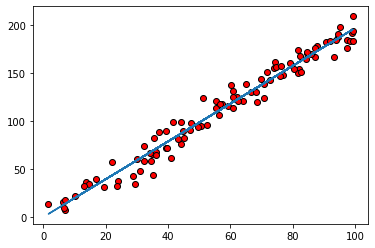

In [6]:
plt.scatter(X, Y, edgecolor="black", color="red")
plt.plot(X, Yhat)
plt.show()

### 1.2. Using Gradient Descent

In [7]:
# We can also do the gradient descent here, that should also work

# Large learning rate might make your cost function increasing suddenly and never converge
learning_rate = .0000001
iteration_count = 1000

# Adding the bias also 
w = np.random.randn(D+1).reshape(-1, 1)
# print(w.shape)
costs = []
ws = []

X_b = np.hstack((np.ones((N, 1)), X))
for i in range(iteration_count):
    Yhat = X_b.dot(w)  
    
    # why not Y - Yhat ? It's really important.
    delta = Yhat - Y    
    w = w - learning_rate*(X_b.T.dot(delta))
    mse = delta.T.dot(delta) / N
    costs.append(mse)

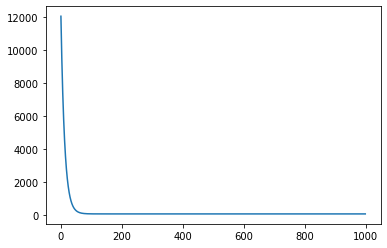

In [8]:
# Plotting cost at each iteration
plt.plot(np.array(costs).ravel())
plt.show()

In [9]:
# Final w 
print("Final w: \n", w)

Final w: 
 [[1.44274069]
 [1.94320554]]


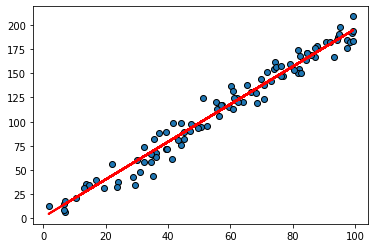

In [10]:
# Plotting the regression line along with the data 
plt.scatter(X, Y, edgecolor="black")
plt.plot(X, Yhat, color="red", linewidth = 2)
plt.show()

In [11]:
# Calculating R-squared 
d1 = Y - Yhat
d2 = Y - Y.mean()
ss_error = d1.T.dot(d1).ravel()
ss_total = d2.T.dot(d2).ravel()

r2 = 1 - ss_error/ss_total

print(r2)

[0.96930193]


In [12]:
# We have a good value of R-squared

### 1.3. Using Normal Equation

In [13]:
# We will have to calculate the closed form solution using the formula inverse(X.T.X)*(X.T.Y) - this will Dx1
# For this we will use numpy method for solving the equation 
w = np.linalg.solve(a=X_b.T.dot(X_b), b=X_b.T.dot(Y))

In [14]:
w

array([[-0.34632225],
       [ 1.96871105]])

In [15]:
# Calculating R-squared 
Yhat = X_b.dot(w)

d1 = Y - Yhat
d2 = Y - Y.mean()
ss_error = d1.T.dot(d1).ravel()
ss_total = d2.T.dot(d2).ravel()

r2 = 1 - ss_error/ss_total

print(r2)

[0.96950069]


# 2. Linear Regression in 2D 

### 2.1. Normal Equation

In [16]:
# Generating the data for linear regression in 2D 
N = 100
D = 2
X = np.random.uniform(low=0, high=100, size=(N, D))
Y = 3*X[:, 0] + .5*X[:, 1] + 3 + np.random.normal(scale=10)

# Adding bias 
ones = np.ones((N, 1))
X_b = np.hstack((ones, X))

In [17]:
# Applying normal equation or closed form solution
w = np.linalg.solve(a=X_b.T.dot(X_b), b=X_b.T.dot(Y))

In [18]:
print("Final weights: \n", w)

Final weights: 
 [-6.7378349  3.         0.5      ]


In [19]:
# Calculating R-squared 
Yhat = X_b.dot(w)

d1 = Y - Yhat
d2 = Y - Y.mean()
ss_error = d1.T.dot(d1).ravel()
ss_total = d2.T.dot(d2).ravel()

r2 = 1 - ss_error/ss_total

print(r2)

[1.]


### 2.2. Using Gradient Descent

In [20]:
learning_rate = .0000001
costs = []

# Why divide by sqrt(D) ?
w = np.random.randn(D+1) / np.sqrt(D+1)
iteration_count = 10000

for _ in range(iteration_count):
    Yhat = X_b.dot(w)
    
    delta = Yhat - Y
    
    w = w - learning_rate*(X_b.T.dot(delta))
    
    mse = delta.T.dot(delta) / N
    costs.append(mse)

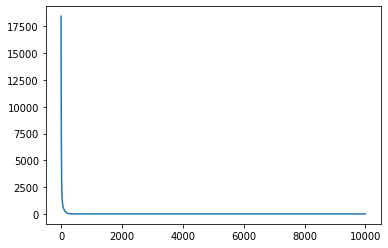

In [21]:
plt.plot(costs)
plt.show()

In [22]:
print(w)

[0.87596956 2.94143859 0.42583384]


In [23]:
# Calculating R-squared for gradient descent solution
Yhat = X_b.dot(w)

d1 = Y - Yhat
d2 = Y - Y.mean()
ss_error = d1.T.dot(d1).ravel()
ss_total = d2.T.dot(d2).ravel()

r2 = 1 - ss_error/ss_total

print(r2)

[0.99893721]


# 3. Polynomial Regression

In [24]:
N = 150

# Uniform sampling
X = np.random.uniform(low=0, high=100, size=N).reshape(-1, 1)
X2 = .7*X*X
Y = X + X2 + 3 + np.random.normal(scale=10, size=N).reshape(-1, 1)

X_b = np.hstack((X, X2))

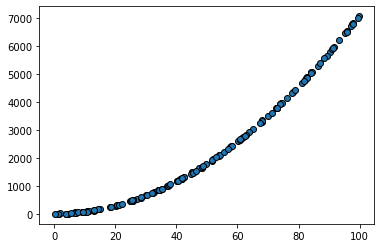

In [25]:
plt.scatter(X_b[:, 0], Y, edgecolor="black")
plt.show()

### 3.1. Using Normal Equation

In [26]:
w = np.linalg.solve(X_b.T.dot(X_b), X_b.T.dot(Y))

In [27]:
w

array([[1.12517685],
       [0.99816775]])

In [28]:
# Calculating R-squared value
Yhat = X_b.dot(w)

d1 = Y - Yhat
d2 = Y - Y.mean()
ss_error = d1.T.dot(d1).ravel()
ss_total = d2.T.dot(d2).ravel()

r2 = 1 - ss_error/ss_total

print(r2)

[0.99998079]


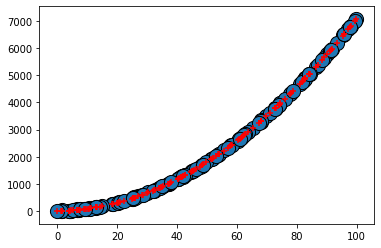

In [36]:
plt.scatter(X_b[:, 0], Y, edgecolor="black", s=200)
plt.scatter(X_b[:, 0], Yhat, color="red", marker="+", edgecolor="black")
plt.show()

In [ ]:
# Let's see what happens to R-squared value if we do not use that
X_b = np.hstack((np.ones((N ,1)), X))

w = np.linalg.solve(X_b.T.dot(X_b), X_b.T.dot(Y))

In [ ]:
w

In [ ]:
# Calculating R-squared value
Yhat = X_b.dot(w)

d1 = Y - Yhat
d2 = Y - Y.mean()
ss_error = d1.T.dot(d1).ravel()
ss_total = d2.T.dot(d2).ravel()

r2 = 1 - ss_error/ss_total

print(r2)

In [ ]:
# R-squared has reduced here

In [ ]:
plt.scatter(X_b[:, 1], Y, edgecolor="black")
plt.scatter(X_b[:, 1], Yhat, color="red", marker="+", edgecolor="black")
plt.show()

In [ ]:
# We can clearly see the error here